## Features reduction

In [7]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sb

np.random.seed = 0

#df = pd.read_excel("../data/HH_SURVEY1/UG_HH_NEW_continuous_no200_train.xls")

df = pd.read_excel("../data/t00/data.xls")

#Drop 'protected' features
drop_cols = ['prop', 'other_prop', 'other_resp']
df = df[[col for col in df.columns if col not in drop_cols]]

## comment/uncomment for shuffling
#df = df.sample(frac=1.0)
TEST_SIZE = 100
# df_test = df.head(TEST_SIZE)
# df_train = df.tail(df.shape[0] - TEST_SIZE)
df_base = df.copy()

df_train = df.head(df.shape[0] - TEST_SIZE)
df_test = df.tail(TEST_SIZE)
df_train.to_excel("../data/t00/train.xls")
df_test.to_excel("../data/t00/test.xls")


df_full = pd.read_excel("../data/t00/data.xls")
df_min = df_full.min()
df_max = df_full.max()
df_max["Honesty_Humility"] = 5.0
df_max["Extraversion"] = 5.0
df_max["Agreeableness"] = 5.0
df_max["cells"] = 50
df_max["selfish"] = 60


df.head()


,time_spent_risk,cells,selfish,time_spent_prop,count_effort,Honesty_Humility,Extraversion,Agreeableness,min_offer
0,43000,26,60,31000,20,4.2,3.0,2.8,50
1,12000,7,20,38000,20,1.9,4.4,2.9,50
2,88000,50,20,69000,12,3.3,3.8,3.4,80
3,24000,50,60,26000,14,3.6,3.8,2.6,50
4,137000,24,60,43000,4,3.6,2.5,2.7,100


## Determine significant features

**Feature importance permutation**

In [9]:
from core.utils.preprocessing import df_to_xy, df_to_xydf
from core.models import AcceptanceModel
from core.utils.benchmark import process_model, process_benchmark_cv
from mlxtend.evaluate import feature_importance_permutation

In [10]:
# from utils.preprocessing import df_to_xy, df_to_xydf

# NB_REPETITIONS = 5

# imp_vals = None
# imp_all = None
# for _ in range(NB_REPETITIONS):
#     df_x, df_y = df_to_xydf(df_train.sample(frac=1.0), fuse_risk=True)
#     model = AcceptanceModel()
#     split = int(0.6 * df_x.shape[0])
#     model.fit(df_x.values[:split], df_y.values.ravel()[:split])

#     step_imp_vals, step_imp_all = feature_importance_permutation(
#         predict_method=model.predict, 
#         X=df_x.values[split:],
#         y=df_y.values.ravel()[split:],
#         metric='accuracy',
#         num_rounds=3,
#         seed=None)
#     if imp_vals is None:
#         imp_vals = step_imp_vals
#         imp_all = step_imp_all
#     else:
#         imp_vals += step_imp_vals
#         imp_all += step_imp_all


# imp_all /= NB_REPETITIONS
# imp_vals /= NB_REPETITIONS
# std = np.std(imp_all, axis=1)
# indices = np.argsort(imp_vals)[::-1]


# plt.figure(figsize=(15, 8))
# plt.title("Feature importance via permutation importance")
# plt.bar(df_x.columns[indices], imp_vals[indices],
#         yerr=std[indices],)
# plt.show()

In [11]:
# res = {}
# features = list(df) + ['risk']
# if 'min_offer' in features:
#     features.remove('min_offer')
# for col in features:
#     df_train = df_train.sample(frac=1.0)
#     if col == 'risk':    
#         x, y = df_to_xy(df_base, select_columns=[col], fuse_risk=True, df_min=df_min, df_max=df_max)
#         col = 'risk*'
#     else:
#         x, y = df_to_xy(df_base, select_columns=[col], df_min=df_min, df_max=df_max)
#     model = AcceptanceModel()
#     item_res = process_benchmark_cv(model, X=x, y=y)
#     res[col] = item_res.mean()

# res_single_df = pd.DataFrame(res).T
# res_single_df.sort_values(by=['avg_loss_ratio'], inplace=True)
# res_single_df

In [12]:
# from itertools import combinations


# features = list(df_train) + ["risk"]
# if 'min_offer' in features:
#     features.remove('min_offer')

# res = {}
# for cols in combinations(features, 2):
#     df_train = df_train.sample(frac=1.0)
#     #index should be a list
#     cols = list(cols)
#     if cols[0]==cols[1]: continue
#     if "risk" in cols and ("time_spent_risk" in cols or "cells" in cols): continue
#     if "risk" in cols:
#         x, y = df_to_xy(df_base, centered=False, fuse_risk=True, select_columns=cols, df_min=df_min, df_max=df_max)
#     else:
#         x, y = df_to_xy(df_base, centered=False, select_columns=cols, df_min=df_min, df_max=df_max)
#     model = AcceptanceModel()
#     item_res = process_benchmark_cv(model, X=x, y=y)
#     res[":".join(cols)] = item_res.mean()

# res_duo_df = pd.DataFrame(res).T
# res_duo_df.sort_values(by=['avg_loss_ratio'], inplace=True)
# res_duo_df.head(10)

In [13]:
# from itertools import combinations

#res_trio_df = res_duo_df

# features = list(df_train)
# if 'min_offer' in features:
#     features.remove('min_offer')

# res = {}
# for cols in combinations(features, 3):
#     df_train = df_train.sample(frac=1.0)
#     #index should be a list
#     cols = list(cols)
#     if cols[0]==cols[1]: continue
#     x, y = df_to_xy(df_base, centered=False, select_columns=cols, df_min=df_min, df_max=df_max)
#     model = AcceptanceModel()
#     item_res = process_benchmark_cv(model, X=x, y=y, cv=3)
#     res[":".join(cols)] = item_res.mean()

# res_trio_df = pd.DataFrame(res).T
# res_trio_df.sort_values(by=['avg_loss_ratio'], inplace=True)
# res_trio_df.head(10)

In [14]:
# from itertools import combinations


# features = list(df)
# if 'min_offer' in features:
#     features.remove('min_offer')

# res = {}
# for cols in combinations(features, 4):
#     #index should be a list
#     cols = list(cols)
#     if cols[0]==cols[1]: continue
#     x, y = df_to_xy(df, centered=False, select_columns=cols, df_min=df_min, df_max=df_max)
#     model = AcceptanceModel()
#     item_res = process_benchmark_cv(model, X=x, y=y)
#     res[":".join(cols)] = item_res.mean()

# res_quad_df = pd.DataFrame(res).T
# res_quad_df.sort_values(by=['avg_loss_ratio'], inplace=True)
# res_quad_df.head(10)

## Train model with top features

In [15]:
#top_columns = ['time_spent_prop', 'count_effort']

#top_columns = ['time_spent_prop', 'count_effort', 'selfish', 'Honesty_Humility']

top_columns = ['selfish', 'time_spent_prop']
#top_columns = ["risk", "time_spent_prop"]
epsilon = 0.01
# if res_duo_df.avg_loss_ratio[0] - epsilon < res_trio_df.avg_loss_ratio[0]:
#     top_columns = res_duo_df.index[0].split(':')
# else:
#     top_columns = res_trio_df.index[0].split(':')
# # if res_single_df.avg_loss_ratio[0] - epsilon < res_duo_df.avg_loss_ratio[0] and \
# #         res_single_df.avg_loss_ratio[0] - epsilon < res_trio_df.avg_loss_ratio[0]:
# #     top_columns = [res_single_df.index[0]]

if "risk" in top_columns:
    x, y = df_to_xy(df_train, centered=False, fuse_risk=True, select_columns=top_columns, min_target=5, max_target=190, df_min=df_min, df_max=df_max)
else:
    x, y = df_to_xy(df_train, centered=False, select_columns=top_columns, min_target=5, max_target=190, df_min=df_min, df_max=df_max)


     selfish  time_spent_prop
0   1.000000         0.059289
1   0.333333         0.086957
2   0.333333         0.209486
3   1.000000         0.039526
4   1.000000         0.106719
5   0.333333         0.158103
6   0.666667         0.075099
7   0.500000         0.083004
8   0.000000         0.264822
9   0.416667         0.047431
10  0.666667         0.102767
11  0.333333         0.126482
12  0.666667         0.110672
13  0.750000         0.039526
14  1.000000         0.154150
15  0.000000         0.075099
16  0.333333         0.173913
17  1.000000         0.118577
18  0.000000         0.079051
19  0.166667         0.000000
20  0.500000         0.150198
21  0.500000         0.126482
22  0.500000         0.545455
23  0.666667         0.146245
24  0.750000         0.233202
25  1.000000         0.110672
26  0.500000         0.031621
27  0.000000         0.059289
28  0.500000         0.426877
29  1.000000         0.090909
..       ...              ...
49  1.000000         0.130435
50  0.8333

In [16]:
split = int(x.shape[0] * 0.8)
xTrain, yTrain = x[:split], y[:split]
xTest, yTest = x[split:], y[split:]


In [17]:
model = AcceptanceModel(step=5, zero_one=False)

In [19]:
from core.models.metrics import gain_mean, avg_loss_ratio

model.fit(xTrain, yTrain)
yPred = model.predict(xTest)

print("Train AVG loss ratio: ", avg_loss_ratio(yTrain, model.predict(xTrain)))

print("Val Mean gain: ", gain_mean(yTest, yPred))
print("Val AVG loss ratio: ", avg_loss_ratio(yTest, yPred))

Train AVG loss ratio:  0.26028728894633746
Val Mean gain:  95.0
Val AVG loss ratio:  0.17215521584127735


In [20]:
print("Unique values: ", np.unique(yTest))
print("Unique predicted values: ", np.unique(yPred))

Unique values:  [ 30  50  80  85  90 100]
Unique predicted values:  [105.]




## Generate data for the survey

In [21]:
from sklearn.ensemble import BaggingRegressor, BaggingClassifier


top_model = AcceptanceModel.get_trained_model(xTrain, yTrain)

top_loss_ratio = avg_loss_ratio(yTrain, top_model.predict(xTrain))

print("top acc:", 1 - top_loss_ratio,)   # "Val acc: ", avg_loss_ratio(yTest, top_model.predict(xTest)))


top acc: 0.7621530349821315


In [22]:
# Read and sanitize the data
df_train = df.head(df.shape[0] - 100)
#df_test = df.tail(100)
df_test = pd.read_excel("../data/HH_SURVEY1/UG_HH_NEW_continuous_no200_test.xls")

if "risk" in top_columns:
    df_features, df_y = df_to_xydf(df_test, centered=False, fuse_risk=True, select_columns=top_columns, df_min=df_min, df_max=df_max)
else:
    df_features, df_y = df_to_xydf(df_test, centered=False, select_columns=top_columns, df_min=df_min, df_max=df_max)
predictions = top_model.predict(df_features.values).astype(int)

df_final = df_test[top_columns].copy()
#RESCALE FEATURES
df_final['ai_offer'] = predictions.ravel()
df_final['min_offer'] = df_y['min_offer']
df_final.head()

     selfish  time_spent_prop
0   0.416667         0.166008
1   0.500000         0.197628
2   0.500000         0.086957
3   0.250000         0.545455
4   0.250000         0.264822
5   0.333333         0.217391
6   1.000000         0.189723
7   0.666667         0.260870
8   0.500000         0.126482
9   0.500000         0.209486
10  0.666667         0.086957
11  0.666667         0.027668
12  0.250000         0.288538
13  0.000000         0.086957
14  0.750000         0.213439
15  0.666667         0.075099
16  0.833333         0.146245
17  0.000000         0.083004
18  0.000000         0.308300
19  0.666667         0.075099
20  0.500000         0.063241
21  0.250000         0.225296
22  1.000000         0.169960
23  0.750000         0.177866
24  0.416667         0.106719
25  1.000000         0.138340
26  0.666667         0.075099
27  0.000000         0.114625
28  0.750000         0.067194
29  0.750000         0.126482
..       ...              ...
70  0.250000         0.102767
71  0.1666

,selfish,time_spent_prop,ai_offer,min_offer
0,25,58000,100,100
1,30,66000,100,120
2,30,38000,100,100
3,15,154000,105,90
4,15,83000,100,100


**Save the model and model infos**

In [23]:
df_final['ai_offer'].unique()

array([100, 105])

In [24]:
print("Test/ai - mean gain: ", gain_mean(df_final['min_offer'], df_final['ai_offer']))
print("Test/ai - avg loss ratio: ", avg_loss_ratio(df_final['min_offer'], df_final['ai_offer']))

Test/ai - mean gain:  92.8
Test/ai - avg loss ratio:  0.2231253278741434


In [25]:
import json
import os
from utils.explanation import get_pdf

test_gain_mean = gain_mean(df_final['min_offer'], df_final['ai_offer'])
test_avg_loss_ratio = avg_loss_ratio(df_final['min_offer'], df_final['ai_offer'])
infos_filename = "../data/t00/00.json"
pdf, bins_pdf = get_pdf(yTrain)
err = top_model.predict(xTrain) - yTrain
train_err_pdf, bins_train_err_pdf = np.histogram(err, bins=np.arange(-200, 200, 5), density=True)

infos = {
    "test_gain_mean": test_gain_mean,
    "test_avg_loss_ratio": test_avg_loss_ratio,
    "val_gain_mean": gain_mean(yTest, yPred),
    "val_avg_loss_ratio": avg_loss_ratio(yTest, yPred),
    "top_columns": list(top_columns),
    "pdf": pdf.tolist(),
    "acc": 1 - avg_loss_ratio(yTest, yPred),
    "bins_pdf": bins_pdf.tolist(),
    "train_err_pdf": train_err_pdf.tolist(),
    "bins_train_err_pdf": bins_train_err_pdf.tolist()
}

save_actual = False
old_infos = {}
if os.path.exists(infos_filename):
    with open(infos_filename) as inp_f:
        old_infos = json.load(inp_f)
        
if old_infos:
    if infos["test_avg_loss_ratio"] < old_infos["test_avg_loss_ratio"]:
        save_actual = True
else:
    save_actual = True


if save_actual:
    with open(infos_filename, "w") as out_f:
        json.dump(infos, out_f, indent=4)
    df_final.to_excel("../data/HH_SURVEY1/UG_HH_NEW_continuous_no200_test_PRED.xls", index=False)
    print("Saved new data")
else:
    print("Kept old data")
        

ModuleNotFoundError: No module named 'utils'

In [ ]:

ai_offer = 110
offer = 95

delta = ai_offer - offer

@np.vectorize
def sigmoid1024(x):
    base = 2000.0**2
    return (base**x/(base**x + 1))

@np.vectorize
def loss(x):
    offset = +5
    x1 = (x + offset) / 16.0
    x2 = (x) / 40.0
    return (1 - sigmoid1024(x1) *  np.cos(x2/np.pi))

def gain(x):
    return 1 - loss(x)

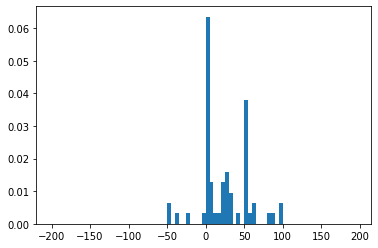

In [28]:
dy = top_model.predict(xTrain) - yTrain.ravel()
#plt.plot(dy)
vals, bins = np.histogram(dy, bins=np.arange(-200, 200, 5), density=True)


_ = plt.hist(dy, density=True, bins=bins)

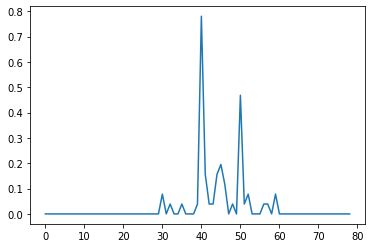

In [29]:
nvals = vals/vals.max() * (1 - 0.22)

plt.plot(nvals, )